# Тест: Непараметрические критерии

In [117]:
import numpy as np
import pandas as pd
from scipy import stats

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Задача 1
Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49,58,75,110,112,132,151,276,281,362∗
Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H0:medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [8]:
X = np.array([49,58,75,110,112,132,151,276,281,362])

In [28]:
# Критерий знаковых рангов для одной выборки (Уилксона)
m0 = 200
stats.wilcoxon(X-m0)

WilcoxonResult(statistic=17.0, pvalue=0.28450269791120752)

#### Задача 2
В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:
22,22,15,13,19,19,18,20,21,13,13,15,
и в 9 лесах, где идёт вырубка:
17,18,18,15,12,4,14,15,10.
Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [31]:
X1 = [22,22,15,13,19,19,18,20,21,13,13,15]
X2 = [17,18,18,15,12,4,14,15,10]

In [116]:
# Критерий знаковых рангов для двух независымых выборок (Манна-Уинти)
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=27.0, pvalue=0.029004992720873729)

#### Задача 3
28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

challenger.txt
С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
сделайте по 1000 псевдовыборок из каждой выборки.

In [64]:
data = pd.read_csv('challenger.txt', sep='\t')

In [65]:
data.head(3)

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0


In [66]:
# функция генерации n_samples случайных псевдовыборок из выборки data такого же размера
def get_bootstrap_samples(data, n_samples):
    # от нуля до длины data, размером в длину data, количество подвыборок равна n_samples
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [67]:
# оценка интервала на основе перцентилей a/2 и (1-a)/2
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [68]:
Incident_t = data[data.Incident == 1].Temperature.values
Incident_f = data[data.Incident == 0].Temperature.values

In [77]:
np.random.seed(0)

# создадим по 1000 псевдовыборок
mean_Incident_t = map(np.mean, get_bootstrap_samples(Incident_t, 1000))
mean_Incident_f = map(np.mean, get_bootstrap_samples(Incident_f, 1000))

# оценим интервалы
print "95% доверительный интервал температур для инцидентов:",  stat_intervals(mean_Incident_t, 0.05)
print "95% доверительный интервал температур штатный режим:",  stat_intervals(mean_Incident_f, 0.05)

95% доверительный интервал температур для инцидентов: [ 14.61428571  20.71607143]
95% доверительный интервал температур штатный режим: [ 21.14359375  23.55046875]


In [78]:
# посчитаем попарные разности средних псeвдовыборок
delta_mean = map(lambda x,y: y-x, median_Incident_t, median_Incident_f)

# оценим интервалы
print "95% доверительный интервал штатный режим:",  stat_intervals(delta_mean, 0.05)

95% доверительный интервал штатный режим: [ 1.45040179  8.06457589]


#### Задача 3.2
На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

установите random seed = 0;
возьмите 10000 перестановок.

In [88]:
# T-статистика это разность средних
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [89]:
# случайные комбинации в случае ограничения на количество переборов (max_combinations)
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [90]:
# определение нулевого распределения посредсвтом перебора всех возмодных комбинаций 
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None): # max_combinations - ограничения на кол. перестановок
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

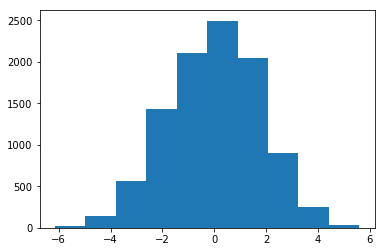

In [113]:
np.random.seed(0)
pylab.hist(permutation_zero_dist_ind(Incident_t, Incident_f, max_combinations = 10000))
pylab.show()

In [114]:
# определение критерия значимости
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    # T-статистика
    t_stat = permutation_t_stat_ind(sample, mean)
    
    # 
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [115]:
np.random.seed(0)

print "p-value: %f" % permutation_test(Incident_t, Incident_f, max_permutations = 10000)

p-value: 0.005700
